In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

In [8]:
n_train = 1000

train_x = np.random.normal(0,1, size = (n_train,1)).astype(np.float32)
train_x_noise = train_x + 0.2*np.random.normal(0,1,size = (n_train, 1))

train_y = (train_x_noise > 0).astype(np.int32)

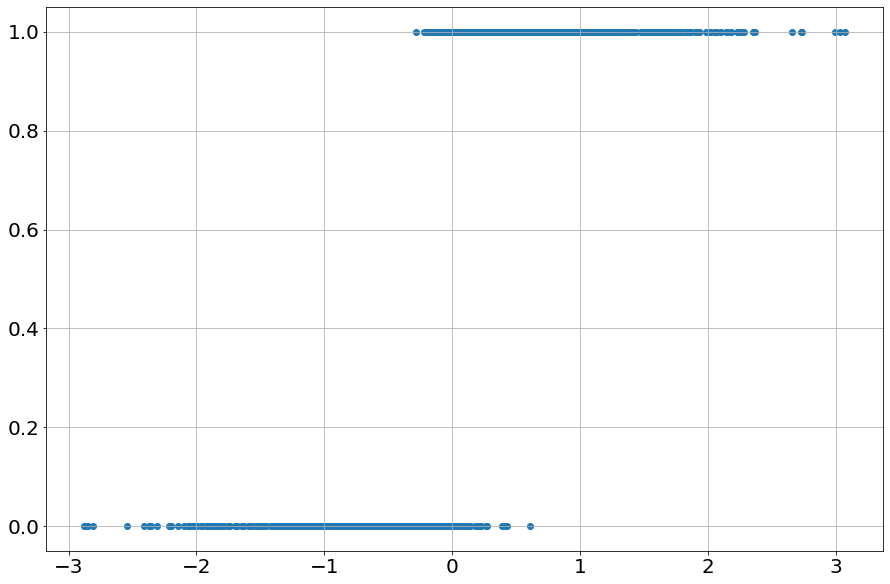

In [10]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(train_x, train_y)
ax.tick_params(labelsize = 20)
ax.grid()

In [12]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)

In [33]:
model = Sequential()
model.add(Dense(units= 2, activation = 'softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer =SGD(learning_rate = 1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

In [34]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        selt.d1 = Dense(units=2, activation = 'softmax')
    def call(self, x):
        x = self.d1(x)
        return x
    

In [41]:
EPOCHS = 10
for epoch in range(EPOCHS):
    for x,y in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_acc(y, predictions)
    print("epoch : {} loss : {}:.4f acc : {:2f}".format(epoch+1, train_loss.result(), train_acc.result()*100))
    train_loss.reset_states() 
    train_acc.reset_states() 
    

epoch : 1 loss : 0.1541079729795456:.4f acc : 92.599998
epoch : 2 loss : 0.1575503796339035:.4f acc : 92.299995
epoch : 3 loss : 0.15792492032051086:.4f acc : 92.500000
epoch : 4 loss : 0.15608030557632446:.4f acc : 92.199997
epoch : 5 loss : 0.15835922956466675:.4f acc : 92.599998
epoch : 6 loss : 0.15791453421115875:.4f acc : 92.599998
epoch : 7 loss : 0.15824568271636963:.4f acc : 92.199997
epoch : 8 loss : 0.15832465887069702:.4f acc : 92.299995
epoch : 9 loss : 0.1564766764640808:.4f acc : 92.500000
epoch : 10 loss : 0.1591425985097885:.4f acc : 92.500000


In [38]:
train_loss = Mean()

loss1 = tf.constant(1)
train_loss(loss1)
print(train_loss.result())

loss2 = tf.constant(2)
train_loss(loss2)
print(train_loss.result())  # 평균이 들어가게 된다/ 누적 값을 평균을 구함

# 두번째 epoch에서는 loss를 초기화 하고 다시 돌려야함

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)


In [39]:
train_loss = Mean()

loss1 = tf.constant(1)
train_loss(loss1)
print(train_loss.result())

train_loss.reset_states() # 초기화 해주기
loss2 = tf.constant(2)
train_loss(loss2)
print(train_loss.result())  

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
